In [1]:
"""
From Ahmad:
I would suggest to try multiple models for classification
and regression and compare them to make your project more
significant. Also focus a bit more on the EDA part and try
to make an interesting analysis with nice visualisations.
There could be interesting questions which could be answered
by your analysis, eg: which category of the projects have a
higher success rate. Also if this data-set was already used
in a kaggle competition, you can also report and compare your
accuracy with the accuracy of the wining team of the
competition in kaggle.
"""

'\nFrom Ahmad:\nI would suggest to try multiple models for classification\nand regression and compare them to make your project more\nsignificant. Also focus a bit more on the EDA part and try\nto make an interesting analysis with nice visualisations.\nThere could be interesting questions which could be answered\nby your analysis, eg: which category of the projects have a\nhigher success rate. Also if this data-set was already used\nin a kaggle competition, you can also report and compare your\naccuracy with the accuracy of the wining team of the\ncompetition in kaggle.\n'

In [2]:
# imports
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data

In [3]:
df = pd.read_csv("../data/ks-projects-201801.csv")
df.head(5)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


# Data cleaning
Data to clean:
* deadline, launched --> datetime

No categorical data in the form of integers --> using strings is fine

The Kaggle user already converted amounts to USD --> we will use these columns


Remove undefined/live/suspended (about 2.1% of the data) --> focus on historical data

In [4]:
df["deadline"] = pd.to_datetime(df["deadline"])
df["launched"] = pd.to_datetime(df["launched"])
df.dtypes

ID                           int64
name                        object
category                    object
main_category               object
currency                    object
deadline            datetime64[ns]
goal                       float64
launched            datetime64[ns]
pledged                    float64
state                       object
backers                      int64
country                     object
usd pledged                float64
usd_pledged_real           float64
usd_goal_real              float64
dtype: object

# EDA

In [5]:
df_pledged = df[['usd pledged','usd_pledged_real','usd_goal_real']] 

print("Pledged:")
print("Median: ", df_pledged["usd pledged"].median())
print("Mode: ", df_pledged["usd pledged"].mean())

print("\nPledged real:")
print("Median: ", df_pledged["usd_pledged_real"].median())
print("Mode: ", df_pledged["usd_pledged_real"].mean())

print("\nPledged goal:")
print("Median: ", df_pledged["usd_goal_real"].median())
print("Mode: ", df_pledged["usd_goal_real"].mean())

Pledged:
Median:  394.72
Mode:  7036.728867109212

Pledged real:
Median:  624.33
Mode:  9058.924074119337

Pledged goal:
Median:  5500.0
Mode:  45454.40146545336


Select the average and the median of the successful project

In [6]:
df_ProjSucc = df.loc[df['state'] == "successful"]
df_ProjFailed = df.loc[df['state'] == "failed"]

print("Pledged:")
print("Median: ", df_ProjSucc["usd pledged"].median())
print("Mode: ", df_ProjSucc["usd pledged"].mean())

print("\nPledged real:")
print("Median: ", df_ProjSucc["usd_pledged_real"].median())
print("Mode: ", df_ProjSucc["usd_pledged_real"].mean())

print("\nPledged goal:")
print("Median: ", df_ProjSucc["usd_goal_real"].median())
print("Mode: ", df_ProjSucc["usd_goal_real"].mean())

Pledged:
Median:  3655.66
Mode:  17356.034449275667

Pledged real:
Median:  5107.25
Mode:  22670.795231195676

Pledged goal:
Median:  3837.74
Mode:  9532.85335722179


Categories

Text(0, 0.5, 'Main Category')

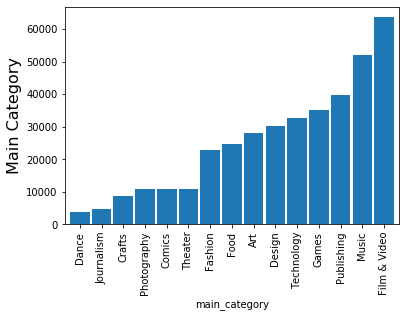

In [7]:
df_main_cat = df.groupby(["main_category"])["ID"].nunique().sort_values(ascending=True)
ax = df_main_cat.plot(kind="bar", x="main_category", width=0.9)
ax.set_ylabel("Main Category", size=16)

Text(0, 0.5, 'Main Category Successful')

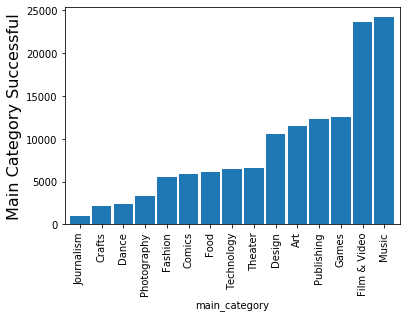

In [8]:
df_main_SuccCat = df_ProjSucc.groupby(["main_category"])["ID"].nunique().sort_values(ascending=True)
ax = df_main_SuccCat.plot(kind="bar", x="category", width=0.9)
ax.set_ylabel("Main Category Successful", size=16)

Text(0, 0.5, 'Main Category Failed')

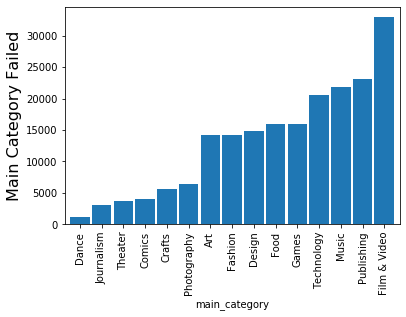

In [9]:
df_main_FailedCat = df_ProjFailed.groupby(["main_category"])["ID"].nunique().sort_values(ascending=True)
ax = df_main_FailedCat.plot(kind="bar", x="category", width=0.9)
ax.set_ylabel("Main Category Failed", size=16)

In [10]:
X = df[["backers","goal","usd_goal_real", "usd_pledged_real"]]
y = df["state"]
X.head()

,backers,goal,usd_goal_real,usd_pledged_real
0,0,1000.0,1533.95,0.0
1,15,30000.0,30000.00,2421.0
2,3,45000.0,45000.00,220.0
3,1,5000.0,5000.00,1.0
4,14,19500.0,19500.00,1283.0


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
from sklearn.preprocessing import StandardScaler
standardize = StandardScaler()
standardize.fit(X_train, y_train)
X_train = standardize.transform(X_train)
X_test = standardize.transform(X_test)

In [13]:
from sklearn.linear_model import LogisticRegressionCV
LR = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000)
LR.fit(X_train, y_train)

/Users/emery/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=1000, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [14]:
LR.score(X_test, y_test)

0.8260335652885796

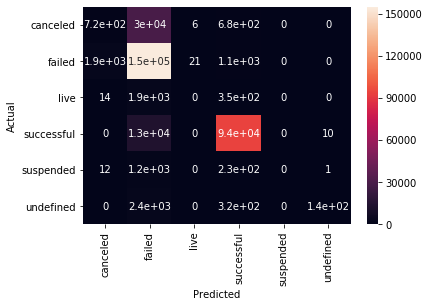

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix
c = confusion_matrix(y_train, LR.predict(X_train))

df_cm = pd.DataFrame(c, index = np.unique(y_test), columns=np.unique(y_test))

df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

sns.heatmap(df_cm, annot=True)

In [21]:
one_hot = OneHotEncoder(categories="auto")
cat_to_onehot = one_hot.fit_transform(df[["main_category","currency"]]).toarray()
cat_to_onehot = pd.DataFrame(cat_to_onehot)

In [25]:
X = pd.concat((X, cat_to_onehot), axis=1)
X.head()

,backers,goal,usd_goal_real,usd_pledged_real,0,1,2,3,4,5,...,19,20,21,22,23,24,25,26,27,28
0,0,1000.0,1533.95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15,30000.0,30000.00,2421.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,45000.0,45000.00,220.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,5000.0,5000.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,14,19500.0,19500.00,1283.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
LR.fit(X_train, y_train)

/Users/emery/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=1000, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [27]:
LR.score(X_test, y_test)

0.8671517040127817